In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/sgvin/bicycle_data/train.csv')

In [3]:
# 데이터셋에 존재하는 컬럼명과 컬럼별 결측치, 컬럼별 데이터타입을 확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


#### 컬럼명
- id 고유 id
- hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수

In [4]:
# 데이터 형태 확인
df.shape

(1459, 11)

In [5]:
df.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [6]:
# 데이터 결측치 확인
df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [12]:
# 결측치 존재하는 행 삭제
df_1  = df.dropna()
print(df_1.shape)
df_1.head()

(1328, 11)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [9]:
df_1.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [10]:
 # 수치형 컬럼별 주요 통계량
df_1.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,1102.612952,11.905120,16.866039,0.030120,2.489834,51.740964,1413.655120,0.039091,57.481175,30.382530,110.804970
std,634.658078,6.746907,5.196544,0.170983,1.382797,20.167066,577.258705,0.019430,31.221062,14.740807,82.900629
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,551.750000,6.000000,13.000000,0.000000,1.400000,36.000000,899.000000,0.026000,36.000000,20.000000,37.000000
50%,1105.500000,12.000000,16.800000,0.000000,2.400000,50.000000,1581.500000,0.038500,52.000000,26.000000,100.500000
75%,1647.500000,18.000000,20.200000,0.000000,3.400000,68.000000,1993.250000,0.052000,70.000000,37.000000,153.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [11]:
# 컬럼간의 수치적 상관관계
df_1_1 = df_1.drop(['id','hour_bef_precipitation'], axis=1)
df_1_1.corr() 

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.400910,0.459260,-0.324225,0.195596,0.387982,-0.047936,-0.062396,0.620985
hour_bef_temperature,0.400910,1.000000,0.369624,-0.483889,0.200940,0.528050,-0.036909,-0.078767,0.610444
hour_bef_windspeed,0.459260,0.369624,1.000000,-0.427355,0.260716,0.515415,-0.004542,-0.197861,0.458083
hour_bef_humidity,-0.324225,-0.483889,-0.427355,1.000000,-0.594662,-0.406968,-0.090507,0.165890,-0.459149
hour_bef_visibility,0.195596,0.200940,0.260716,-0.594662,1.000000,0.096771,-0.417851,-0.643252,0.308597
hour_bef_ozone,0.387982,0.528050,0.515415,-0.406968,0.096771,1.000000,0.089405,0.016552,0.468639
hour_bef_pm10,-0.047936,-0.036909,-0.004542,-0.090507,-0.417851,0.089405,1.000000,0.487626,-0.137321
hour_bef_pm2.5,-0.062396,-0.078767,-0.197861,0.165890,-0.643252,0.016552,0.487626,1.000000,-0.136345
count,0.620985,0.610444,0.458083,-0.459149,0.308597,0.468639,-0.137321,-0.136345,1.000000


<AxesSubplot:>

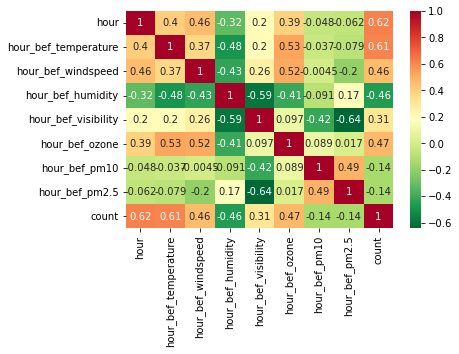

In [12]:
# 상관관계 히트맵
sns.heatmap(df_1_1.corr(), annot=True, cmap='RdYlGn_r')

### 시각화

<AxesSubplot:xlabel='hour', ylabel='count'>

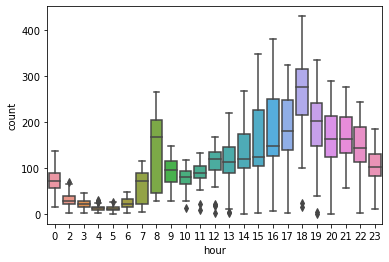

In [13]:
#시간대별 이용 수
sns.boxplot(x="hour", y="count", data=df_1)

<AxesSubplot:xlabel='hour_bef_precipitation', ylabel='count'>

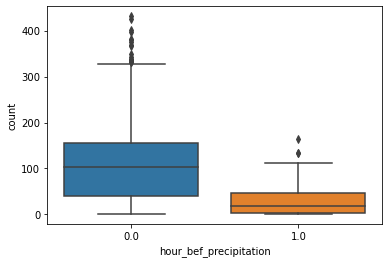

In [14]:
# 비가 오는 것과 안오는 것의 이용 수
sns.boxplot(x="hour_bef_precipitation", y="count", data=df_1)

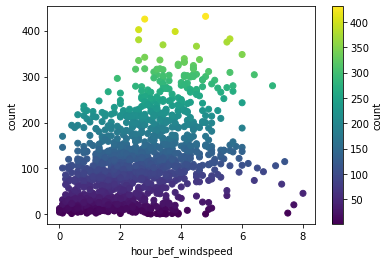

In [15]:
plt.scatter(df_1['hour_bef_windspeed'], df_1['count'], c= df_1['count'])

plt.xlabel('hour_bef_windspeed')
plt.ylabel('count')
plt.colorbar(label='count')
plt.show()

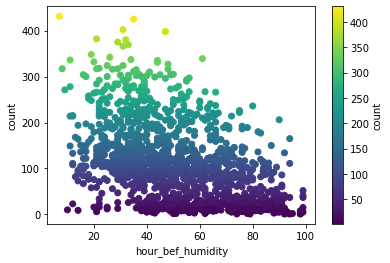

In [16]:
plt.scatter(df_1['hour_bef_humidity'], df_1['count'], c= df_1['count'])

plt.xlabel('hour_bef_humidity')
plt.ylabel('count')
plt.colorbar(label='count')
plt.show()

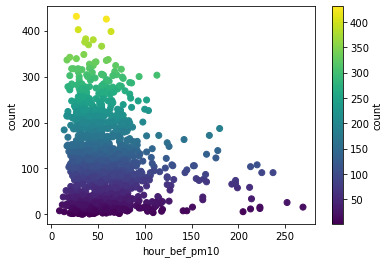

In [17]:
plt.scatter(df_1['hour_bef_pm10'], df_1['count'],c= df_1['count'])

plt.xlabel('hour_bef_pm10')
plt.ylabel('count')
plt.colorbar(label='count')
plt.show()

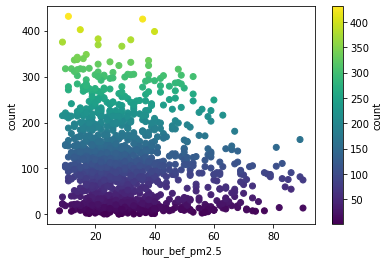

In [18]:
plt.scatter(df_1['hour_bef_pm2.5'], df_1['count'],c= df_1['count'])

plt.xlabel('hour_bef_pm2.5')
plt.ylabel('count')
plt.colorbar(label='count')
plt.show()

### 새로운 컬럼 생성 - b_weather: 미세먼지와 초미세먼지 모두 나쁨인 경우

In [19]:
'''

미세먼지(pm10) 기준
좋음: 0 ~ 30
보통: 31~ 80
나쁨: 81~ 150
매우나쁨: 151 ~

초미세먼지(pm2.5) 기준
좋음: 0 ~ 15
보통: 16 ~ 35
나쁨: 36 ~ 75
매우나쁨: 76~

'''

'\n\n미세먼지(pm10) 기준\n좋음: 0 ~ 30\n보통: 31~ 80\n나쁨: 81~ 150\n매우나쁨: 151 ~\n\n초미세먼지(pm2.5) 기준\n좋음: 0 ~ 15\n보통: 16 ~ 35\n나쁨: 36 ~ 75\n매우나쁨: 76~\n\n'

In [20]:
def weather1(a,b):
    if  a > 80 and b > 35:
            return 1
    else:
            return 0

In [21]:
df_1['b_weather'] = df_1.apply(lambda x: weather1( x['hour_bef_pm10'], x['hour_bef_pm2.5']), axis=1)
test_1['b_weather'] = test_1.apply(lambda x: weather1( x['hour_bef_pm10'], x['hour_bef_pm2.5']), axis=1)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_584/820487110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['b_weather'] = df_1.apply(lambda x: weather1( x['hour_bef_pm10'], x['hour_bef_pm2.5']), axis=1)
C:\Users\sgvin\AppData\Local\Temp/ipykernel_584/820487110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['b_weather'] = test_1.apply(lambda x: weather1( x['hour_bef_pm10'], x['hour_bef_pm2.5']), axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='b_weather', ylabel='count'>

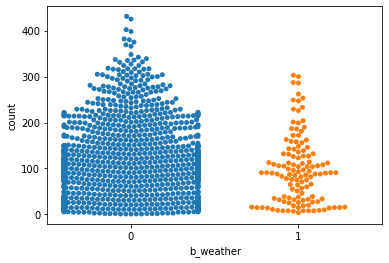

In [22]:
sns.swarmplot(x="b_weather", y="count", data=df_1) # 각 'b_weather'에서의 count 분포 정도

### 새로운 컬럼 생성 - discomfort: 기온과 습도로 계산한 불쾌지수
[불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32]

In [23]:
"""
70 이상인 경우에는 약 10 %
75 이상 경우에는 약 50 %
80 이상인 경우에는 대부분의 사람
"""

'\n70 이상인 경우에는 약 10 %\n75 이상 경우에는 약 50 %\n80 이상인 경우에는 대부분의 사람\n'

In [24]:
def discft(temp, humid):
    humid = humid / 100
    
    discomfort_index = 1.8 * temp - 0.55 * (1 - humid) * (1.8 * temp - 26) + 32
    return discomfort_index

In [25]:
df_1['discomfort'] = df_1.apply(lambda x: discft(x['hour_bef_temperature'], x['hour_bef_humidity']), axis = 1)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_584/357516636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['discomfort'] = df_1.apply(lambda x: discft(x['hour_bef_temperature'], x['hour_bef_humidity']), axis = 1)


In [26]:
df_1.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,b_weather,discomfort
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,61.13793
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,65.26852
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,57.13319
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,49.46926
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,71.23835


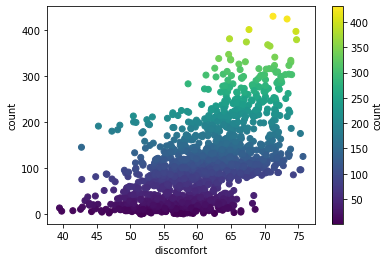

In [27]:
plt.scatter(df_1['discomfort'], df_1['count'],c= df_1['count'])

plt.xlabel('discomfort')
plt.ylabel('count')
plt.colorbar(label='count')
plt.show()

## 모델링

In [28]:
df_1.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count',
       'b_weather', 'discomfort'],
      dtype='object')

In [29]:
from sklearn import metrics
from sklearn import tree
from sklearn import model_selection

In [30]:
x_data = df_1.drop('count', axis = 1)
y_data = df_1['count']

In [31]:
# train:test 7대 3비율로 나누기
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.3, random_state = 11)

In [32]:
input_var1 = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'b_weather', 'discomfort'] # 'b_weather', 'discomfort' 포함

In [40]:
x_data[input_var1].values

array([[20.     , 16.3    ,  1.     , ..., 33.     ,  0.     , 61.13793],
       [13.     , 20.1    ,  0.     , ..., 40.     ,  0.     , 65.26852],
       [ 6.     , 13.9    ,  0.     , ..., 19.     ,  0.     , 57.13319],
       ...,
       [ 5.     , 18.3    ,  0.     , ..., 21.     ,  0.     , 63.18418],
       [21.     , 20.7    ,  0.     , ..., 36.     ,  0.     , 65.35841],
       [17.     , 21.1    ,  0.     , ..., 17.     ,  0.     , 66.48783]])

## 모델링

In [33]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

LinearRegression

In [34]:
# 선형회귀분석
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train[input_var1],y_train)

y_predict = reg.predict(x_test[input_var1])

print(r2_score(y_test, y_predict))

0.6456059183371514


DecisionTree

In [35]:
#의사결정나무
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=11)
dt_reg.fit(x_train[input_var1], y_train)


y_predict = dt_reg.predict(x_test[input_var1])

print(r2_score(y_test, y_predict))

0.6291747326351955


RandomForest

In [36]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

forest= RandomForestRegressor(random_state=11)
forest.fit(x_train[input_var1],y_train)

y_predict = forest.predict(x_test[input_var1])

print(r2_score(y_test, y_predict))

0.7931765234314627


GradientBoosting

In [37]:
# GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingRegressor 

gb_clf = GradientBoostingRegressor(random_state=11)
gb_clf.fit(x_train[input_var1],y_train)

y_predict = gb_clf.predict(x_test[input_var1])

print(r2_score(y_test, y_predict))

0.7897674257798483


XGBoost

In [57]:
# XGBoost
from xgboost import XGBRegressor, plot_tree, plot_importance

xgb = XGBRegressor()
xgb.fit(x_train[input_var1],y_train)

y_predict = xgb.predict(x_test[input_var1])

print(r2_score(y_test, y_predict))

0.7684672485569327


## 하이퍼파라미터 최적화

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
# grid_search
forest= RandomForestRegressor(random_state=11)
forest_params = {'n_estimators' : [100, 200, 300, 400, 500],
              'min_samples_leaf' : [1, 2, 3, 4, 5],
              'random_state' : [11]}

grid = GridSearchCV(estimator = forest, param_grid = forest_params, scoring = 'r2')

grid.fit(x_train[input_var1],y_train)
best_param = grid.best_params_
print(best_param)

{'min_samples_leaf': 2, 'n_estimators': 300, 'random_state': 11}


In [60]:
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score
7,"{'min_samples_leaf': 2, 'n_estimators': 300, '...",0.741365,1
2,"{'min_samples_leaf': 1, 'n_estimators': 300, '...",0.741061,2
8,"{'min_samples_leaf': 2, 'n_estimators': 400, '...",0.741060,3
1,"{'min_samples_leaf': 1, 'n_estimators': 200, '...",0.740620,4
3,"{'min_samples_leaf': 1, 'n_estimators': 400, '...",0.740337,5
4,"{'min_samples_leaf': 1, 'n_estimators': 500, '...",0.740187,6
6,"{'min_samples_leaf': 2, 'n_estimators': 200, '...",0.740110,7
9,"{'min_samples_leaf': 2, 'n_estimators': 500, '...",0.740023,8
12,"{'min_samples_leaf': 3, 'n_estimators': 300, '...",0.738880,9
13,"{'min_samples_leaf': 3, 'n_estimators': 400, '...",0.738474,10


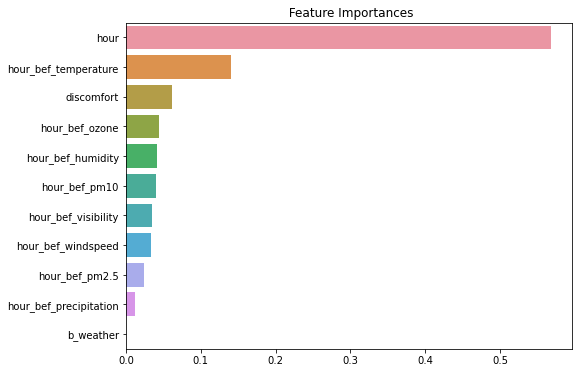

In [64]:
%matplotlib inline

ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train[input_var1].columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title(' Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()